In [1]:
import os

In [4]:
# os.chdir('/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/01_level1/cluster_scripts')
os.chdir('/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/01_level1')

In [5]:
from level1_plot_utils import plot_stat_map_matrix

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-nvr-fmri/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [9]:
import matplotlib.pyplot as plt

In [7]:
fig_path = '/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/01_level1/figs'

base_path = '/Users/zeynepenkavi/CpuEaters/overtrained_decisions_bidsfmri'
contrasts_path = os.path.join(base_path, 'derivatives/nilearn/glm/level1')

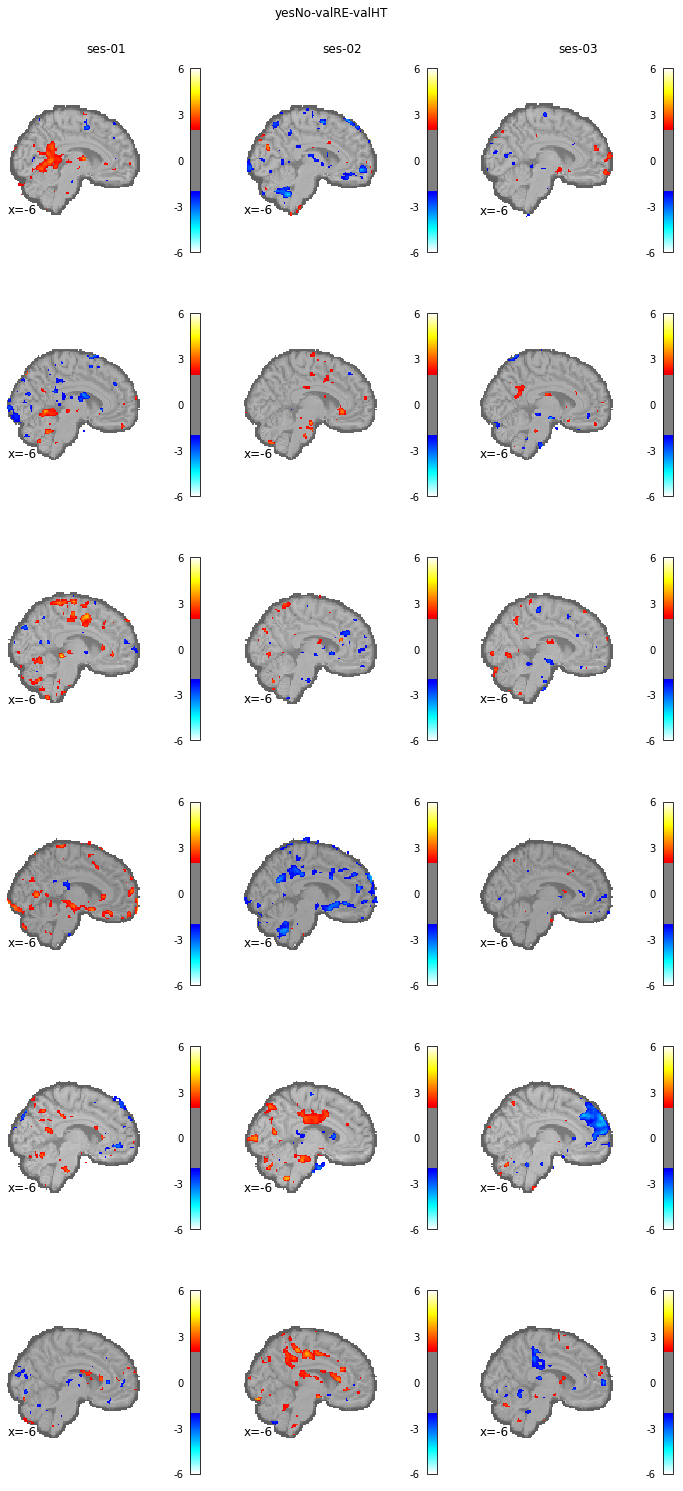

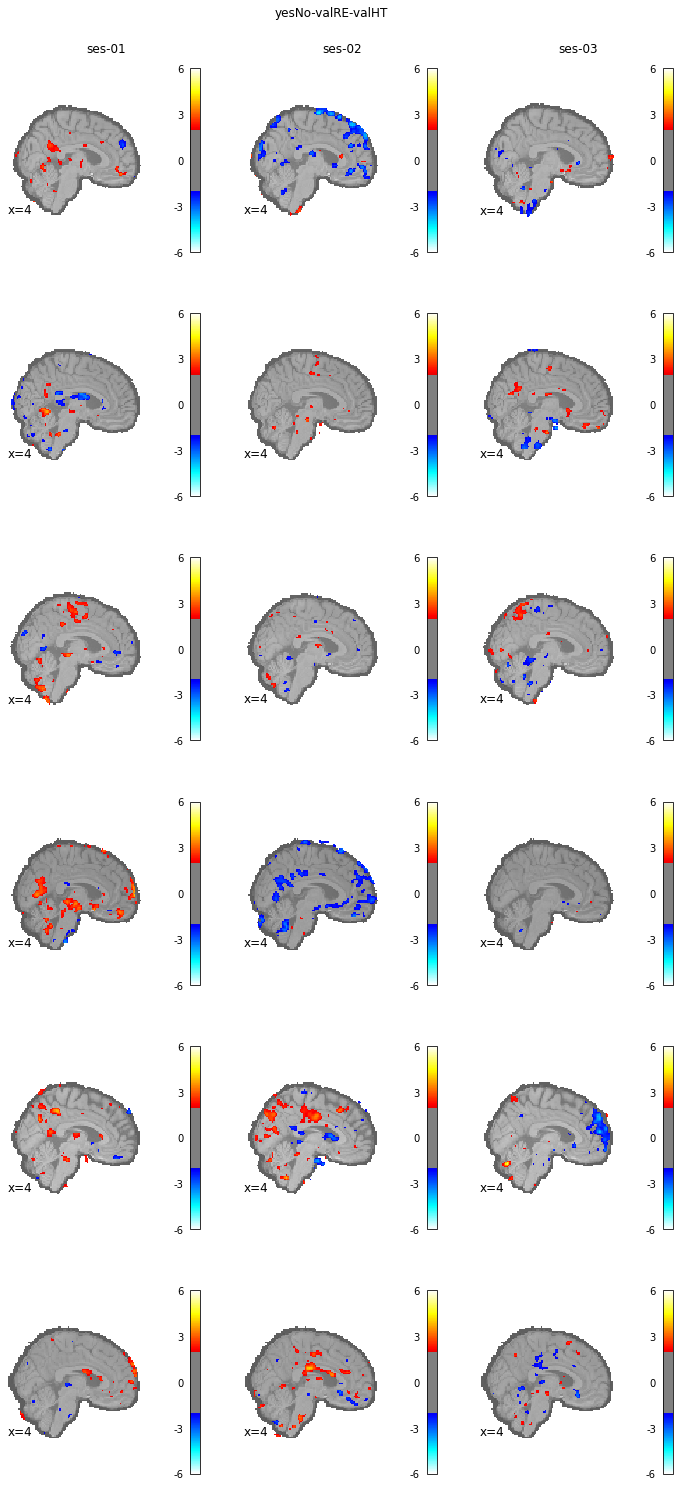

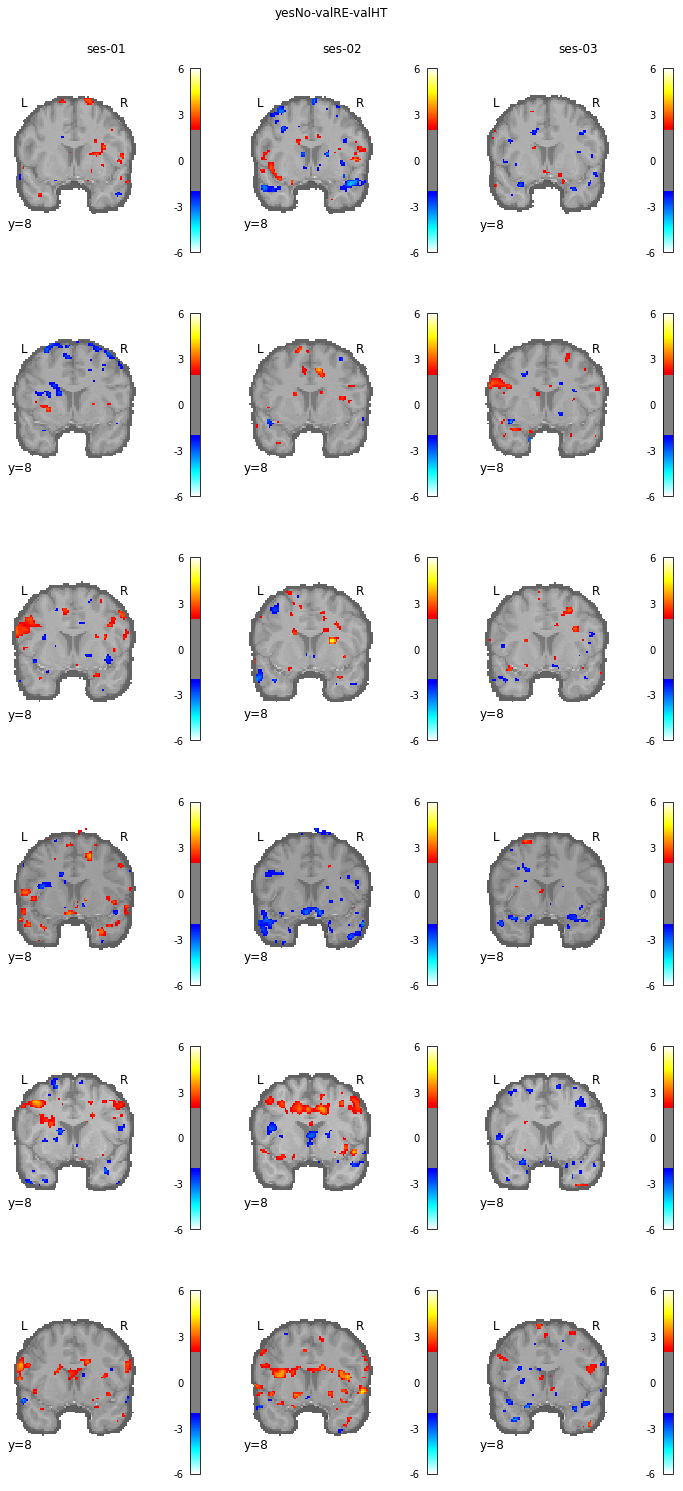

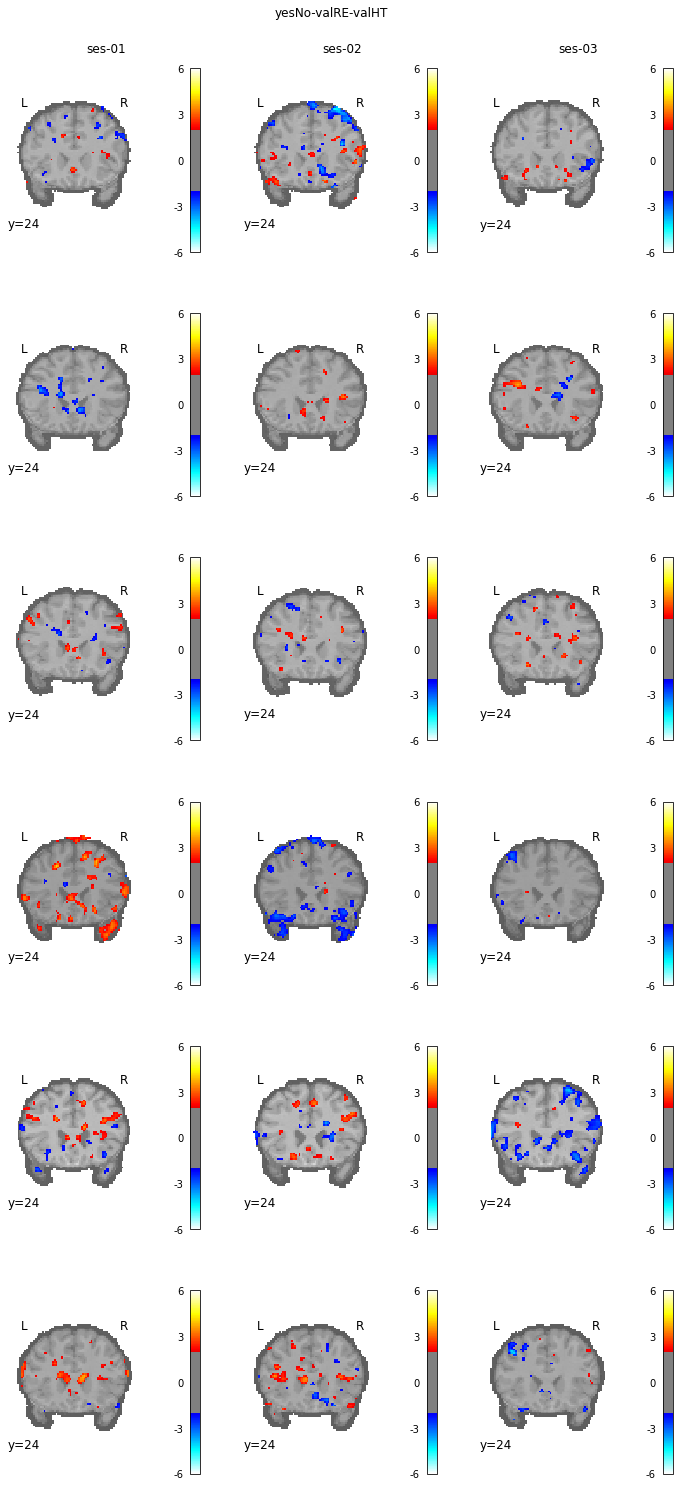

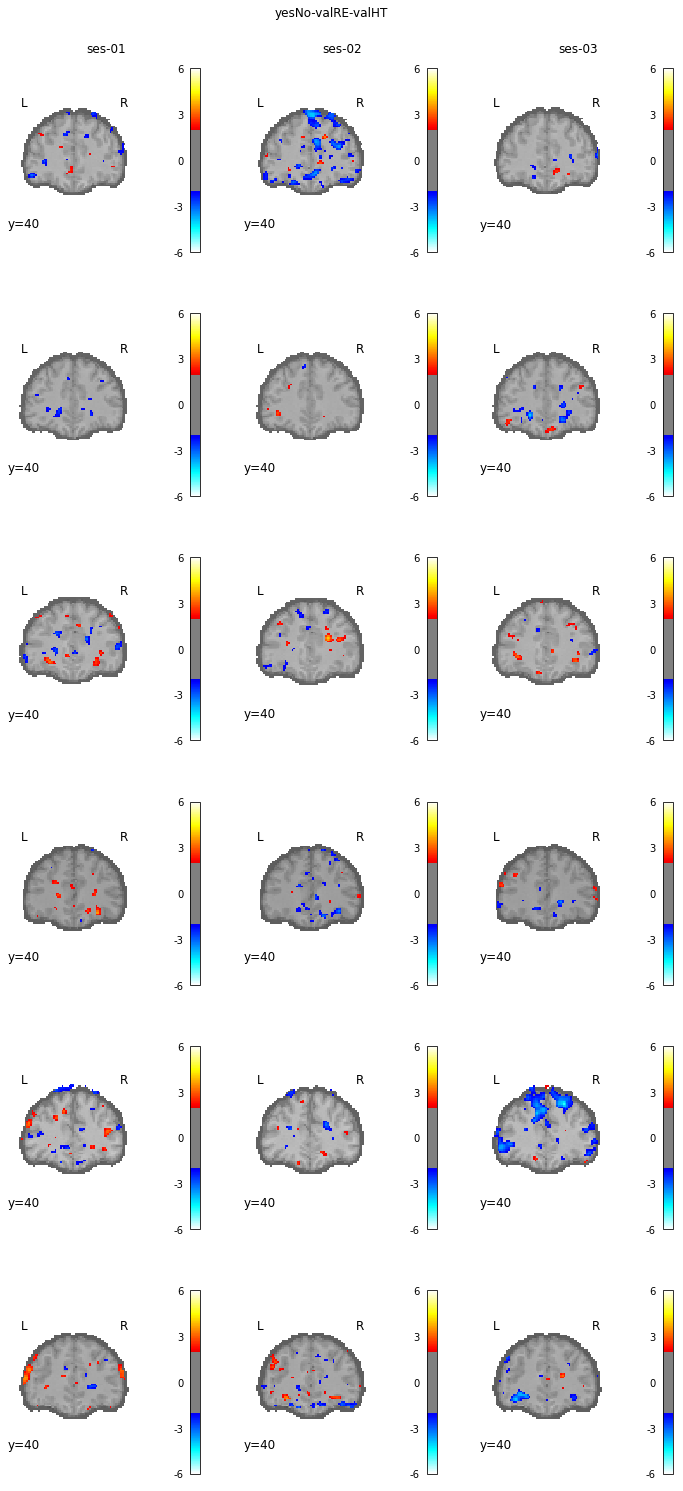

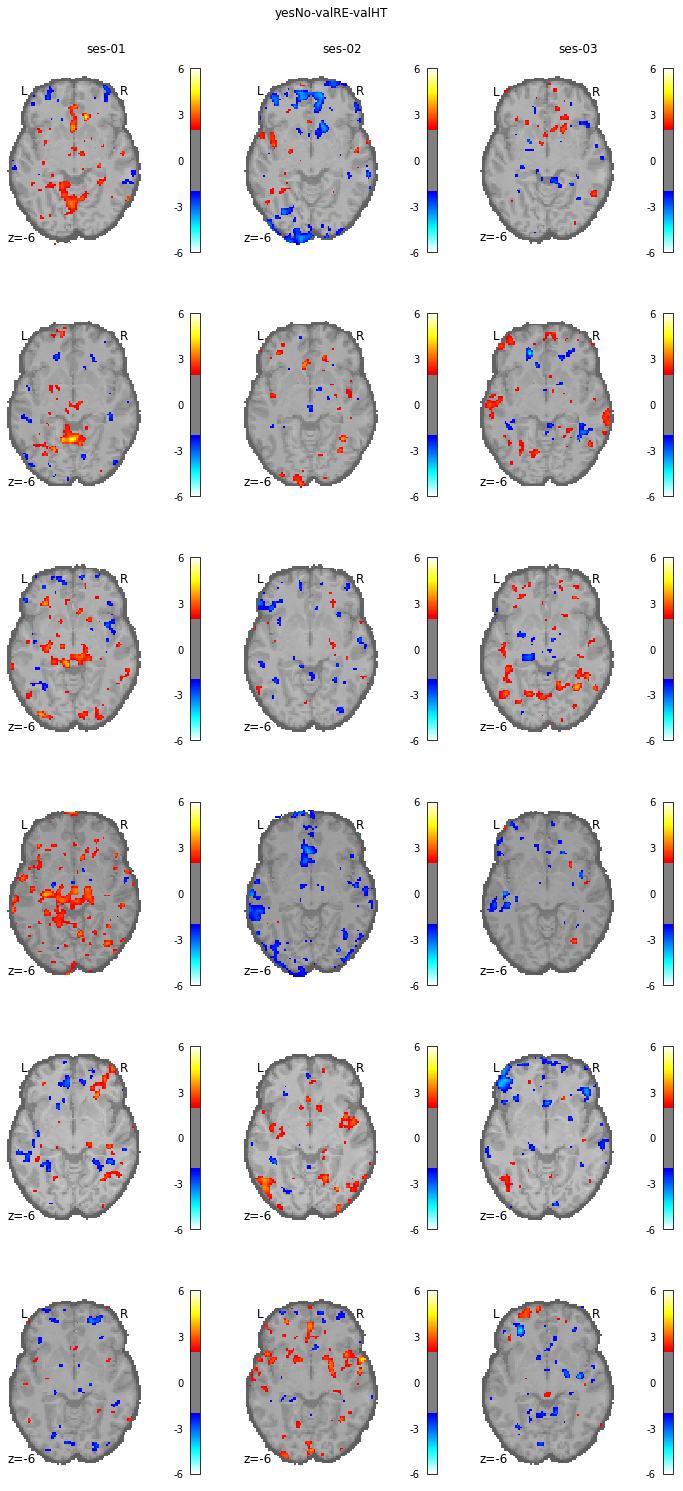

In [10]:
figs_list = [{'reg': 'valRE-valHT', 'task': 'yesNo', 'cut': -6, 'disp_mode': 'x'},
            {'reg': 'valRE-valHT', 'task': 'yesNo', 'cut': 4, 'disp_mode': 'x'},
            {'reg': 'valRE-valHT', 'task': 'yesNo', 'cut': 8, 'disp_mode': 'y'},
            {'reg': 'valRE-valHT', 'task': 'yesNo', 'cut': 24, 'disp_mode': 'y'},
            {'reg': 'valRE-valHT', 'task': 'yesNo', 'cut': 40, 'disp_mode': 'y'},
            {'reg': 'valRE-valHT', 'task': 'yesNo', 'cut': -6, 'disp_mode': 'z'}]

mnum = 'model1'
map_type = 'tmap'

for cur_dict in figs_list:
    reg = cur_dict['reg']
    task = cur_dict['task']
    cut = cur_dict['cut']
    disp_mode = cur_dict['disp_mode']

    plot_stat_map_matrix(reg, task, mnum, contrasts_path, map_type, cut_coords = [cut, ], display_mode = disp_mode)

    fig_fn = task + '_' + mnum + '_' + reg + '_' + map_type + '_matrix_' + disp_mode + '_'+ str(cut) + '.jpeg'
    plt.savefig(os.path.join(fig_path, task, fig_fn), transparent=False, pad_inches = 0.05, bbox_inches = 'tight')

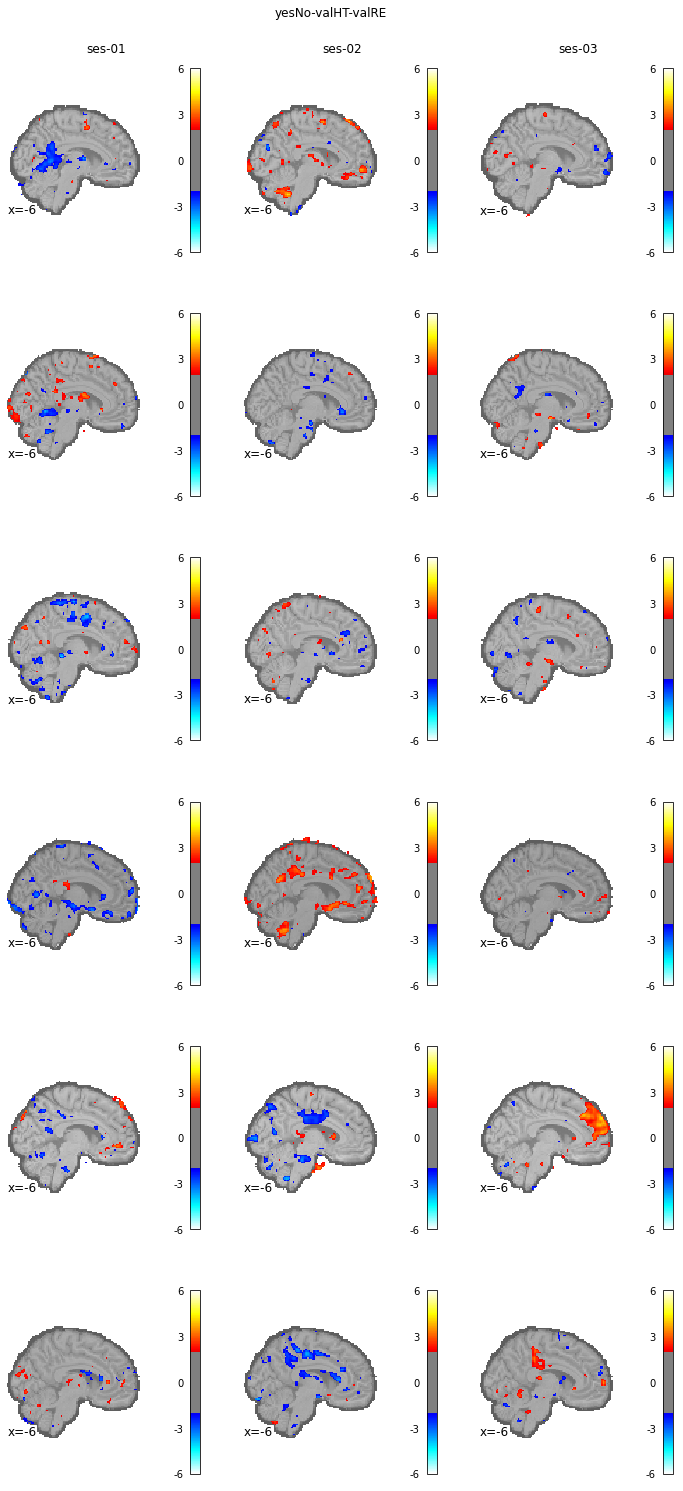

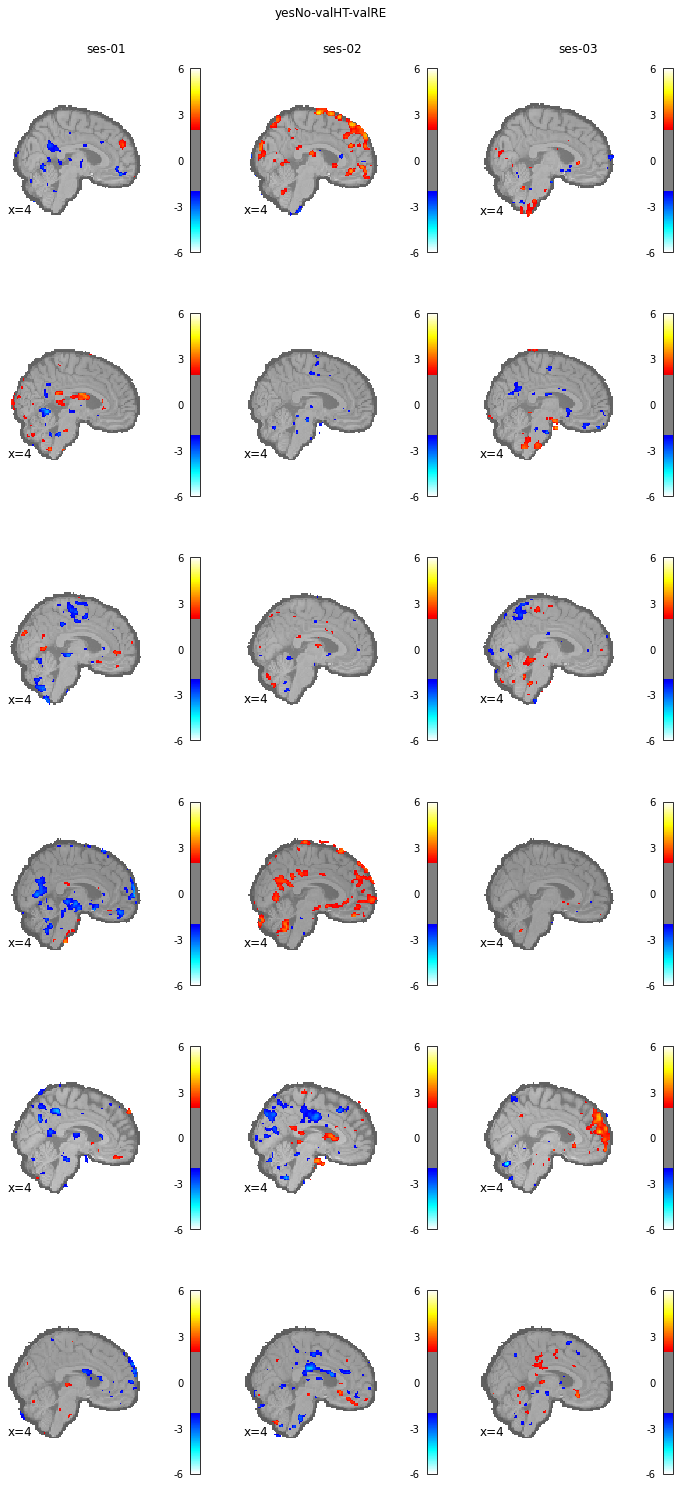

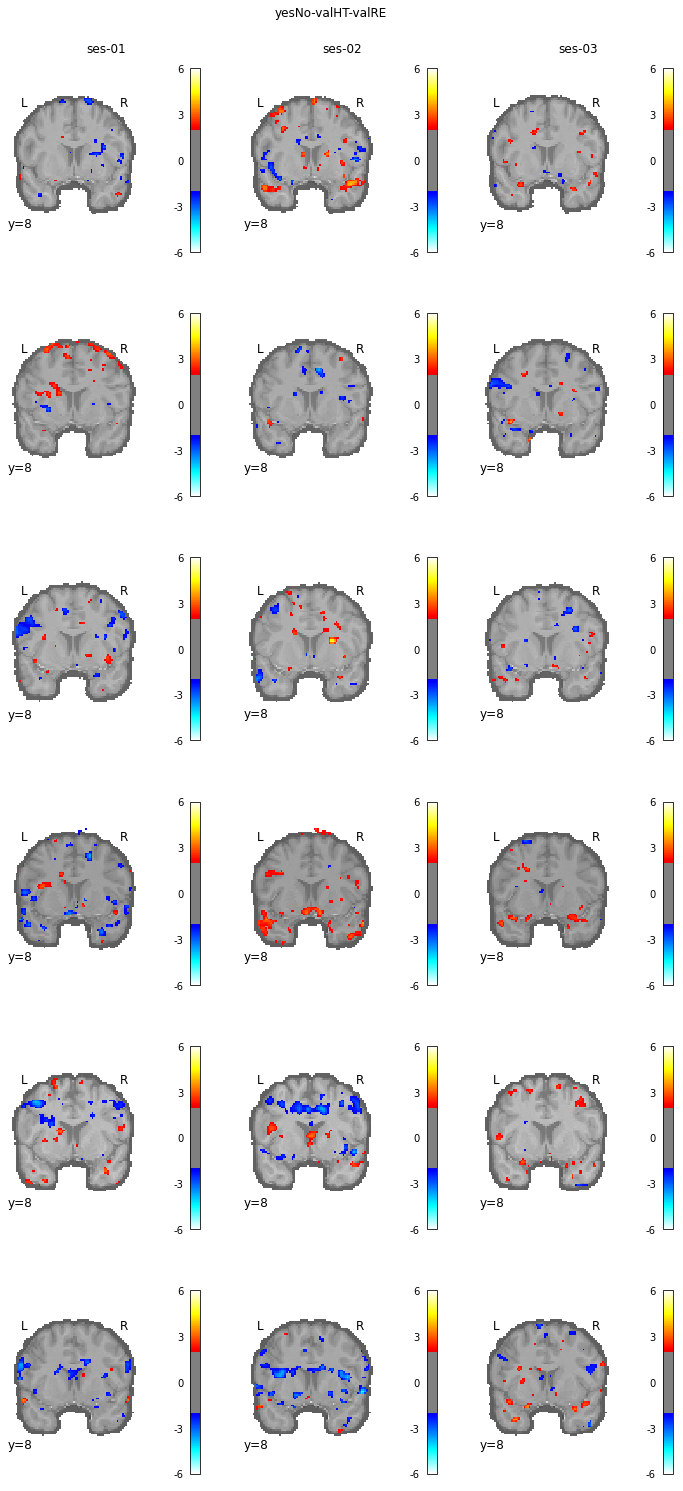

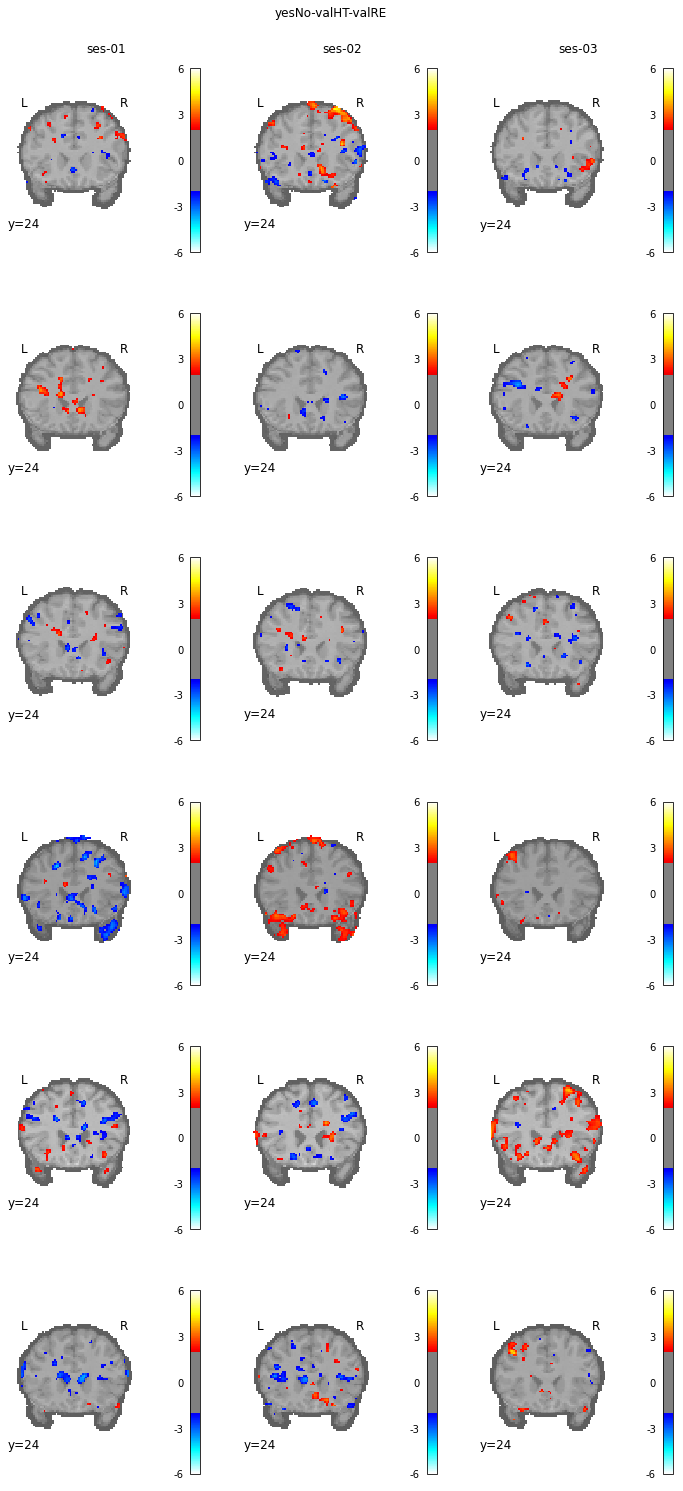

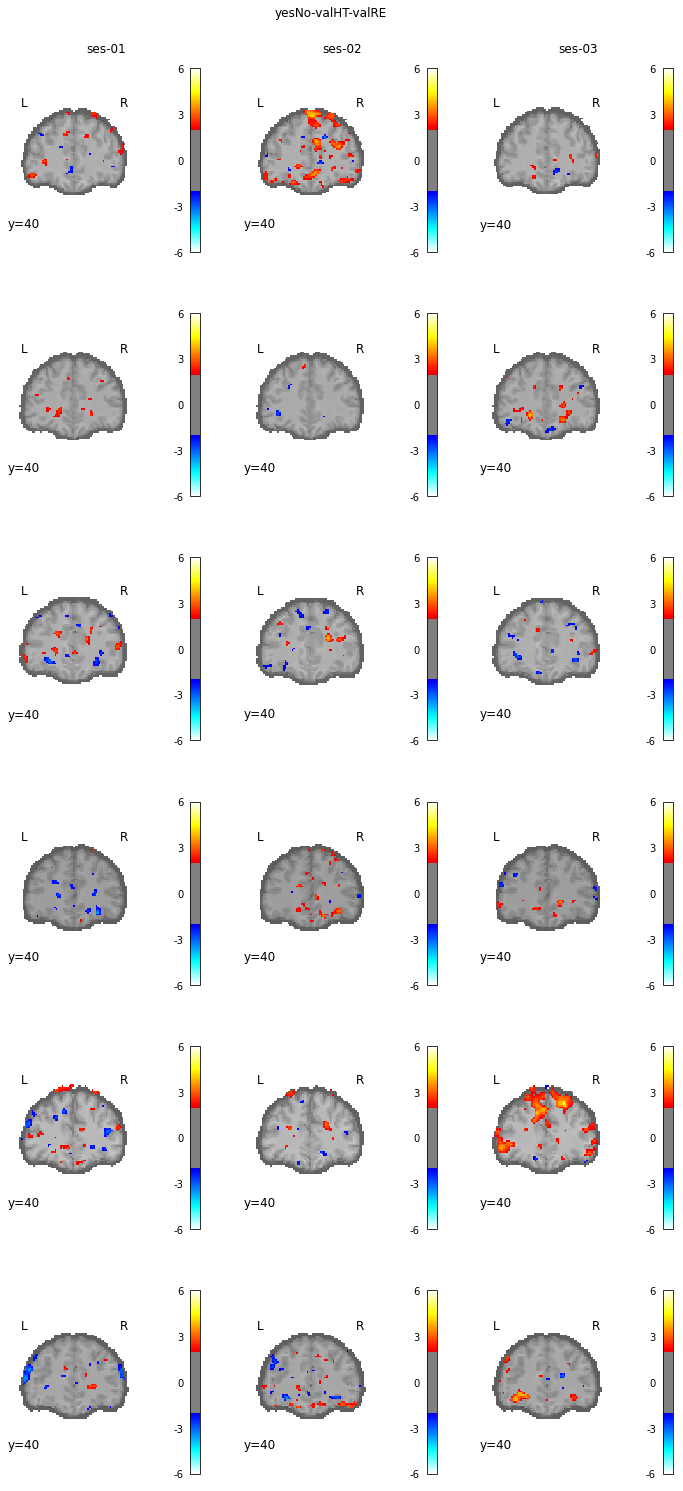

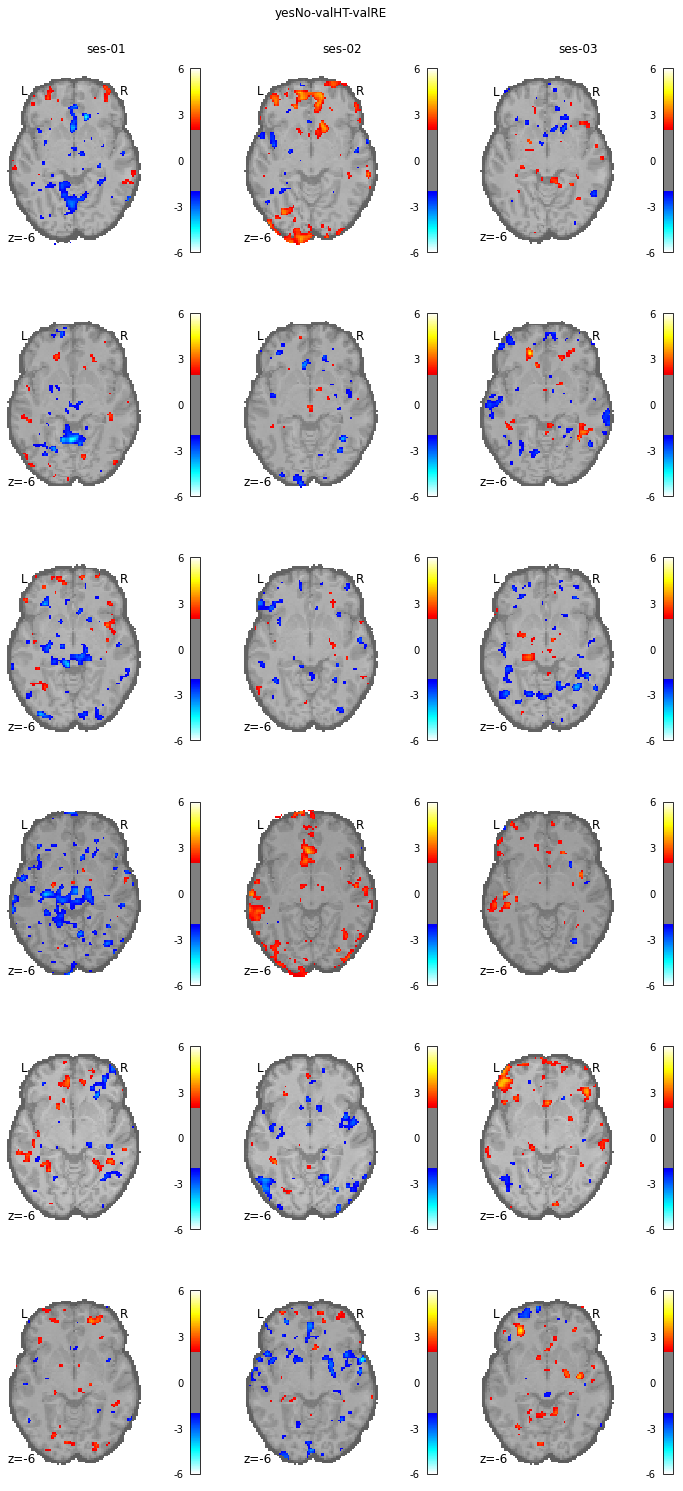

In [11]:
figs_list = [{'reg': 'valHT-valRE', 'task': 'yesNo', 'cut': -6, 'disp_mode': 'x'},
            {'reg': 'valHT-valRE', 'task': 'yesNo', 'cut': 4, 'disp_mode': 'x'},
            {'reg': 'valHT-valRE', 'task': 'yesNo', 'cut': 8, 'disp_mode': 'y'},
            {'reg': 'valHT-valRE', 'task': 'yesNo', 'cut': 24, 'disp_mode': 'y'},
            {'reg': 'valHT-valRE', 'task': 'yesNo', 'cut': 40, 'disp_mode': 'y'},
            {'reg': 'valHT-valRE', 'task': 'yesNo', 'cut': -6, 'disp_mode': 'z'}]

mnum = 'model1'
map_type = 'tmap'

for cur_dict in figs_list:
    reg = cur_dict['reg']
    task = cur_dict['task']
    cut = cur_dict['cut']
    disp_mode = cur_dict['disp_mode']

    plot_stat_map_matrix(reg, task, mnum, contrasts_path, map_type, cut_coords = [cut, ], display_mode = disp_mode)

    fig_fn = task + '_' + mnum + '_' + reg + '_' + map_type + '_matrix_' + disp_mode + '_'+ str(cut) + '.jpeg'
    plt.savefig(os.path.join(fig_path, task, fig_fn), transparent=False, pad_inches = 0.05, bbox_inches = 'tight')